### 1. Carregando Bibliotecas

In [ ]:
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential,load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, AveragePooling2D
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from keras.utils.np_utils import  to_categorical
import tensorflow as tf

Inicializa o Google Drive. É necessário entrar com as credenciais do Gmail

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 2. Carregando o dataset pré-embaralhado de treinamento bem como os dados de teste

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


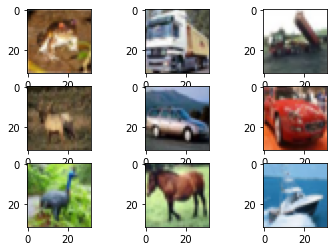

In [ ]:
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train[i])
# show the figure
plt.show()

### 3. Redimensionando as imagens e dividindo cada pixel em cada imagem por 255

In [ ]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Dividindo o dataset em treinamento, teste e validação

"One-hot encoding" aplicado aos rótulos


In [ ]:
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
num_classes

10

divindo dataset de treinamento em treinamento, teste e validação - Apenas para exemplo em um ambiente real as amostras devem ser seleciondas de forma aleatória

In [ ]:
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

Impressão da forma do conjunto de treino

In [ ]:
print('x_train shape:', x_train.shape)

x_train shape: (45000, 32, 32, 3)


In [ ]:
print('x_valid shape:', x_valid.shape)

x_valid shape: (5000, 32, 32, 3)


Impressão do número de imagens nos datasets de treinamento, teste e validação

In [ ]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

45000 train samples
10000 test samples
5000 validation samples


### 5. Definindo a arquitetura do modelo (IMPORTANTE!)

6 camadas convolucionais

3 maxpooling2d

2 Dense

3 dropouts







In [ ]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3),  activation='relu', input_shape=(32, 32, 3)))     
model.add(Conv2D(filters=64, kernel_size=(3,3),  activation='relu', input_shape=(32, 32, 3)))                        
model.add(Conv2D(filters=64, kernel_size=(3,3),  activation='relu', input_shape=(32, 32, 3)))      
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))


model.add(Conv2D(filters=128, kernel_size=(3,3),  activation='relu'))   
model.add(Conv2D(filters=128, kernel_size=(3,3),  activation='relu')) 
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=256, kernel_size=(3,3),  activation='relu'))                        
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

Tentem executar a rede configurando outras funções de ativação (como visto em nossa Aula 3)
mais informações em https://keras.io/activations/

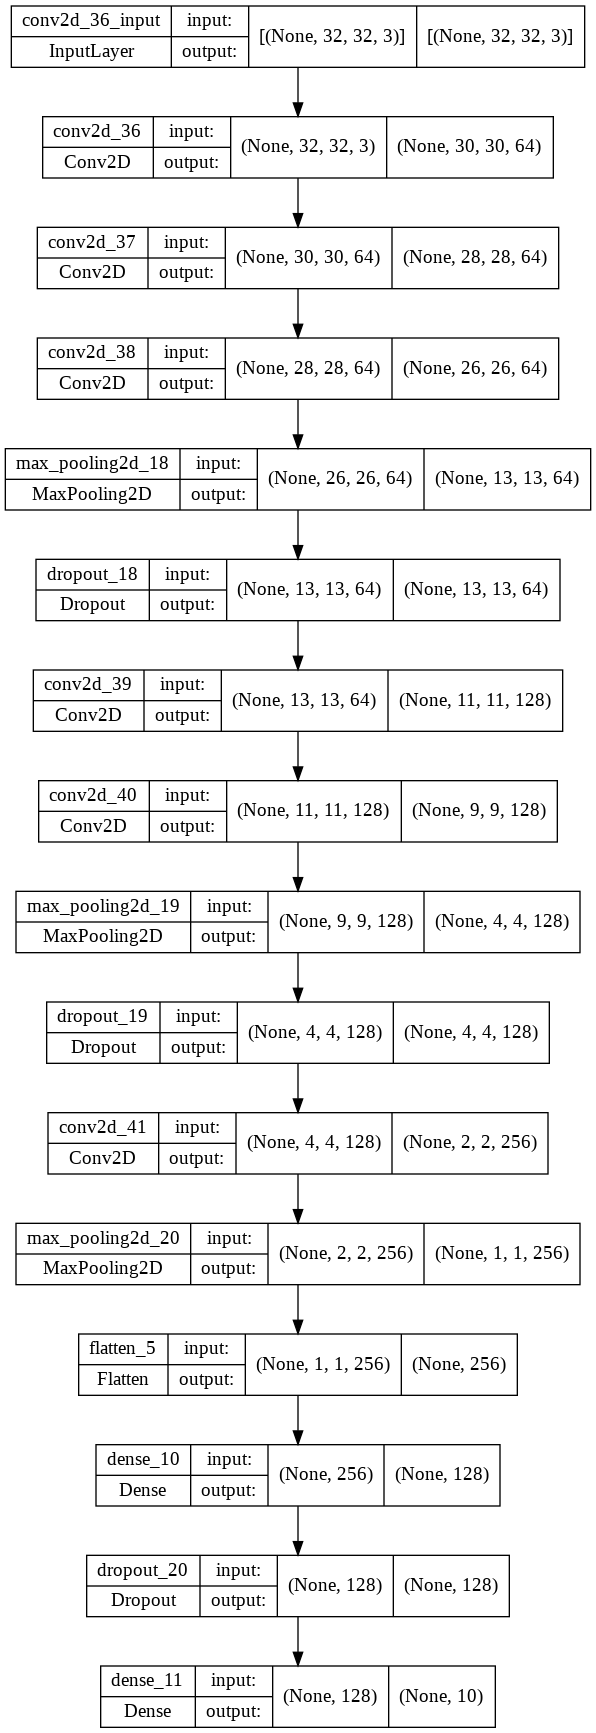

In [ ]:
plot_model(model, to_file='cnn-CIFAR10.png', show_shapes=True, show_layer_names=True)

### 6. Compilando o modelo

Compilando o modelo escolhendo como se dará nossa perda, otimização e métricas (parâmetros do Keras)
* mais informações em https://keras.io/losses/
* mais informações em https://keras.io/optimizers/
* mais informações em https://keras.io/metrics/

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])                  

### 7. Treinando o modelo

In [ ]:
from keras.callbacks import ModelCheckpoint

#O keras passa a salvar o melhor modelo pela acurácia de validação

In [ ]:
checkpointer = ModelCheckpoint(filepath='/content/drive/My Drive/modelocifar_FIAP_20IA.hdf5', verbose=1,  save_best_only=True, monitor='val_accuracy')
                              
hist = model.fit(x_train, y_train, batch_size=70, epochs=25, validation_data=(x_valid, y_valid), callbacks=[checkpointer], verbose=1, shuffle=True)

Epoch 1/25
643/643 [==============================] - ETA: 0s - loss: 1.7710 - accuracy: 0.3372
Epoch 1: val_accuracy improved from -inf to 0.47100, saving model to /content/drive/My Drive/modelocifar_FIAP_20IA.hdf5
643/643 [==============================] - 32s 34ms/step - loss: 1.7710 - accuracy: 0.3372 - val_loss: 1.4480 - val_accuracy: 0.4710
Epoch 2/25
643/643 [==============================] - ETA: 0s - loss: 1.2662 - accuracy: 0.5442
Epoch 2: val_accuracy improved from 0.47100 to 0.61320, saving model to /content/drive/My Drive/modelocifar_FIAP_20IA.hdf5
643/643 [==============================] - 21s 33ms/step - loss: 1.2662 - accuracy: 0.5442 - val_loss: 1.0930 - val_accuracy: 0.6132
Epoch 3/25
643/643 [==============================] - ETA: 0s - loss: 1.0612 - accuracy: 0.6248
Epoch 3: val_accuracy improved from 0.61320 to 0.64520, saving model to /content/drive/My Drive/modelocifar_FIAP_20IA.hdf5
643/643 [==============================] - 21s 33ms/step - loss: 1.0612 - accura

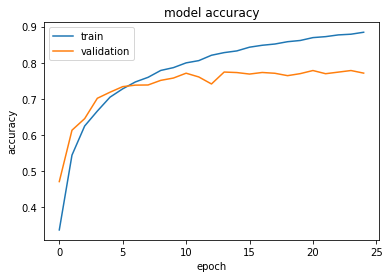

In [ ]:
plt.figure(1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Carregar o melhor modelo que obteve a melhor acurácia de validação no treinamento

### 8. Cálculo da precisão de classificação no dataset de testes

Avaliar e imprimir a precisão do teste

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7626000046730042


### 9. Visualizar algumas predições

As visualizações podem nos dar algumas dicas sobre por que a rede classifica erroneamente alguns objetos.
Obtendo previsões no conjunto de testes:

In [ ]:
y_hat = model.predict(x_test)

In [ ]:
y_hat

array([[5.07579614e-07, 1.09246425e-08, 2.34353429e-05, ...,
        8.48966053e-08, 1.47163191e-05, 3.79028471e-08],
       [7.38894016e-07, 2.61027949e-10, 5.48935922e-15, ...,
        3.04132283e-15, 9.99999285e-01, 5.16399312e-10],
       [9.10192821e-03, 1.36727840e-02, 1.65310717e-04, ...,
        6.36405166e-05, 9.70570624e-01, 5.41162957e-03],
       ...,
       [1.54147326e-08, 5.88387516e-09, 3.64815933e-05, ...,
        1.64939277e-03, 1.91035046e-08, 2.46845810e-09],
       [3.41574162e-01, 5.49694955e-01, 8.63319039e-02, ...,
        8.60783475e-05, 5.52581018e-03, 2.24432768e-03],
       [1.69695586e-20, 1.46963714e-25, 1.98280503e-15, ...,
        9.99984145e-01, 3.02199739e-23, 1.02537895e-22]], dtype=float32)

In [ ]:
y_hat[100,:]

array([1.3187570e-06, 1.5324503e-07, 7.0283249e-02, 5.2088406e-03,
       9.1399312e-01, 9.4107753e-03, 2.6525368e-04, 8.3570788e-04,
       7.0173706e-07, 8.1808236e-07], dtype=float32)

In [ ]:
np.argmax(y_hat[100,:])

4

In [ ]:
y_test[100,:]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
np.argmax(y_test[100,:])

4

Definindo rótulos de texto (rótulos disponíveis na fonte original: https://www.cs.toronto.edu/~kriz/cifar.html)

In [ ]:
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Plot de amostra aleatória de imagens de teste, rótulos preditos e a "ground truth" advinda do dataset CIFAR-10

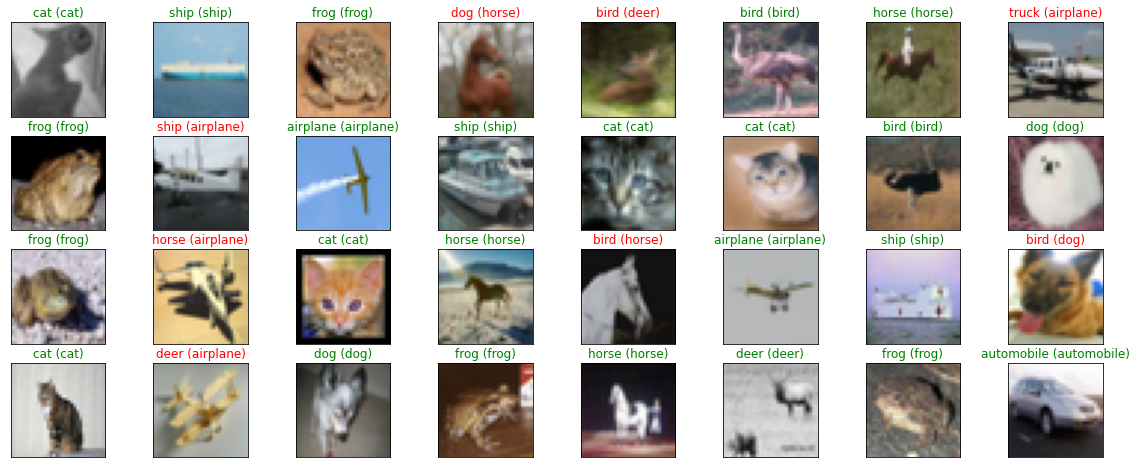

In [ ]:
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
    # amostras corretamente classificadas em verde, incorretamente classificadas em vermelho
